In [1]:
import spacy
import math
nlp = spacy.load('en_core_web_lg', disable=["parser", "tagger", "ner"])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
EPS = 1e-6

In [3]:
fun_fact_df = pd.read_csv('../data/til_title.csv')

/Users/nehalrawat/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,5,8,9,13,14,15,16,19,21,22,24,27,28,33,34,35,41,46,58,60,62,63,64,65,68,74,79,85,92,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
required_columns = ['title', 'subreddit', 'permalink']
fun_fact_df = fun_fact_df.dropna(axis='rows', subset=required_columns)

In [5]:
banned_subreddits = ['circlejerk', 'ShittyTodayILearned', 'TheOnion']
fun_fact_df = fun_fact_df[~fun_fact_df['subreddit'].isin(banned_subreddits)]

In [6]:
fun_fact_df = fun_fact_df.reset_index(drop=True)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy

In [8]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=.8, ngram_range=(1,1), dtype=np.float32)
titles = fun_fact_df['title']
fun_fact_tfidf = vectorizer.fit_transform(titles)

In [9]:
fun_fact_tfidf

<309065x125402 sparse matrix of type '<class 'numpy.float64'>'
	with 2793174 stored elements in Compressed Sparse Row format>

In [10]:
len(vectorizer.get_feature_names())

125402

In [20]:
len(fun_fact_df['title'])

309065

In [21]:
np.sum(fun_fact_tfidf > 0, axis=1) # shows number of tfidf words per doc

matrix([[ 6],
        [10],
        [26],
        ..., 
        [ 4],
        [14],
        [ 5]])

In [22]:
features = vectorizer.get_feature_names()
f_vectors = np.array([nlp.vocab[f].vector for f in features])
weighted_embedding = fun_fact_tfidf.dot(f_vectors)
print(weighted_embedding.shape)

(309065, 300)


In [23]:
n_weighted_embedding = weighted_embedding / (np.linalg.norm(weighted_embedding, axis=1)[:, np.newaxis] + EPS)

In [24]:
print(np.linalg.norm(n_weighted_embedding[22291]))
print(np.linalg.norm(n_weighted_embedding[10493]))

0.99999992046
0.999999906595


In [34]:
query = "flower space car happy laptop college"
query_tfidf = vectorizer.transform([query])
query_weighted = query_tfidf.dot(f_vectors).flatten()
n_query_weighted = query_weighted / np.linalg.norm(query_weighted)
rankings = n_weighted_embedding.dot(n_query_weighted)
rankings_index = np.argsort(-rankings)
fun_fact_df[["subreddit", "title","score"]].loc[rankings_index]

,subreddit,title,score
20242,todayilearned,TIL how to bring a dead laptop back to life,2.0
256773,todayilearned,TIL Leaving you powered down laptop in a hot car will fry your battery =( {Learn from my mistake},2.0
122724,todayilearned,TIL that saving money to buy a laptop as a kid is impossible,0.0
285279,funny,TIL my car is 1 year older than the car Peter drives in office space.,0.0
163197,daddit,TIL it is entirely possible to hold a baby while using a laptop with two hands.,3.0
24703,todayilearned,TIL a Pizza Box is Actually a Laptop Stand,1.0
95466,todayilearned,TIL that I will never be able to have children because I use a laptop,1.0
289543,todayilearned,TIL that there is a new way to get privacy on your laptop aka The Laptop Sweater,1.0
256486,todayilearned,"TIL that If your child has free lunch at school, you can get internet for $10 a month, and have an option to buy a $150 netbook when you sign up",1.0
248135,WTF,TIL...women love flowers. See how to start a flower business,1.0


In [40]:
fun_fact_df[["subreddit", "title","score"]].loc[rankings_index]

,subreddit,title,score
20242,todayilearned,TIL how to bring a dead laptop back to life,2.0
256773,todayilearned,TIL Leaving you powered down laptop in a hot car will fry your battery =( {Learn from my mistake},2.0
122724,todayilearned,TIL that saving money to buy a laptop as a kid is impossible,0.0
285279,funny,TIL my car is 1 year older than the car Peter drives in office space.,0.0
163197,daddit,TIL it is entirely possible to hold a baby while using a laptop with two hands.,3.0
24703,todayilearned,TIL a Pizza Box is Actually a Laptop Stand,1.0
95466,todayilearned,TIL that I will never be able to have children because I use a laptop,1.0
289543,todayilearned,TIL that there is a new way to get privacy on your laptop aka The Laptop Sweater,1.0
256486,todayilearned,"TIL that If your child has free lunch at school, you can get internet for $10 a month, and have an option to buy a $150 netbook when you sign up",1.0
248135,WTF,TIL...women love flowers. See how to start a flower business,1.0


In [42]:
fun_fact_df[["subreddit", "title","score"]]

,subreddit,title,score
0,todayilearned,TIL Corey Feldman already made a movie about killing Bin Laden,1.0
1,til,TIL The new Oreo Fudge Creme (Mint) are just Girl Scout thin mints in an Oreo box.,2.0
2,unremovable,"TIL in 2008, when South Korea's Health Ministry requested a lower price for a leading HIV drug made by Roche, the pharma company refused to sell it. The head of Roche's Korea division reportedly said, ""We are not in the business to save lives, but to make money. Saving lives is not our business.""",1.0
3,todayilearned,TIL that Tom Cruise has a tooth in the middle of his face,0.0
4,todayilearned,TIL why I wouldn't want to be shot by a gun... period... .357 magnum or all of the above...,0.0
5,RisingThreads,r/todayilearned: TIL only one white man has ever run 100 meters in under 10 seconds. The other 75 men who have done it were all black. by /u/Playaguy (52 mins. old),4.0
6,norge,Mann fikk svart skjerm etter at en ulovlig pornoside krevde 1000 kr i betaling (til politiet). Ringte politiet for å låse den opp igjen.,4.0
7,todayilearned,TIL Santa has an evil brother who takes presents away AFTER Christmas if you've been bad.,1.0
8,todayilearned,TIL that some Tampa Bay Rays players spend hundreds of dollars on an IPAD game called We Farm,3.0
9,todayilearned,TIL platform games can be pretty cool.,0.0


In [35]:
for i in range(20):
    print(rankings[rankings_index[i]], titles[rankings_index[i]])

0.806107453524 TIL how to bring a dead laptop back to life
0.792314195102 TIL Leaving you powered down laptop in a hot car will fry your battery =( {Learn from my mistake}
0.791710056815 TIL that saving money to buy a laptop as a kid is impossible
0.788319194023 TIL my car is 1 year older than the car Peter drives in office space.
0.778563027217 TIL it is entirely possible to hold a baby while using a laptop with two hands.
0.778035619815 TIL a Pizza Box is Actually a Laptop Stand
0.77553018227 TIL that I will never be able to have children because I use a laptop
0.774197521381 TIL that there is a new way to get privacy on your laptop aka The Laptop Sweater
0.772297353339 TIL that If your child has free lunch at school, you can get internet for $10 a month, and have an option to buy a $150 netbook when you sign up
0.771842594643 TIL...women love flowers. See how to start a flower business
0.770687258591 TIL that you can rent out your car to strangers and potentially make your money bac

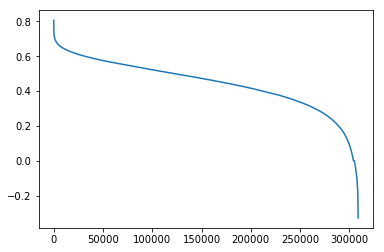

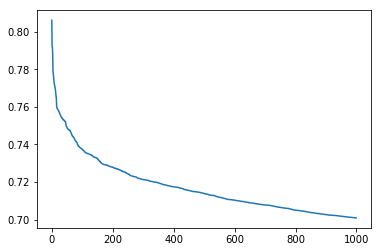

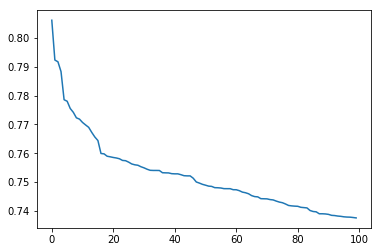

In [36]:
plt.plot(rankings[rankings_index])
plt.show()
plt.plot(rankings[rankings_index[:1000]])
plt.show()
plt.plot(rankings[rankings_index[:100]])
plt.show()

In [43]:
fun_fact_df['score_update'] = fun_fact_df['score'] + 1

In [45]:
list(fun_fact_df)

['Unnamed: 0',
 'adserver_click_url',
 'adserver_imp_pixel',
 'approved_at_utc',
 'author',
 'author_cakeday',
 'author_flair_css_class',
 'author_flair_text',
 'author_id',
 'banned_at_utc',
 'brand_safe',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'crosspost_parent',
 'crosspost_parent_list',
 'disable_comments',
 'distinguished',
 'domain',
 'domain_override',
 'edited',
 'embed_type',
 'embed_url',
 'gilded',
 'href_url',
 'id',
 'imp_pixel',
 'is_crosspostable',
 'is_self',
 'is_video',
 'link_flair_css_class',
 'link_flair_text',
 'locked',
 'media.content',
 'media.deep',
 'media.event_id',
 'media.height',
 'media.oembed.author_name',
 'media.oembed.author_url',
 'media.oembed.cache_age',
 'media.oembed.description',
 'media.oembed.dominant_colors',
 'media.oembed.duration',
 'media.oembed.entropy',
 'media.oembed.height',
 'media.oembed.html',
 'media.oembed.html5',
 'media.oembed.mean_alpha',
 'media.oembed.provider_name',
 'media.oembed.provider_url',
 'media.oembed.

In [55]:
plt.plot((fun_fact_df.plot(fun_fact_df['score_update'],logx=True)))

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

In [56]:
plt.plot(fun_fact_df['score_update'],logx=True)

AttributeError: Unknown property logx

In [59]:
(math.log(fun_fact_df['score_update'])

SyntaxError: unexpected EOF while parsing (<ipython-input-59-22ffbb969a11>, line 1)

In [62]:
fun_fact_df['score_update'].plot(logx=True)